   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

C:\Users\Leandro Esteban\AppData\Local\Temp\ipykernel_21156\3796680072.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=data, ax=axes[0, 1], palette='viridis')
C:\Users\Leandro Esteban\AppData\Local\Temp\ipykernel_21156\3796680072.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=data, ax=axes[1, 1], palette='Set2')


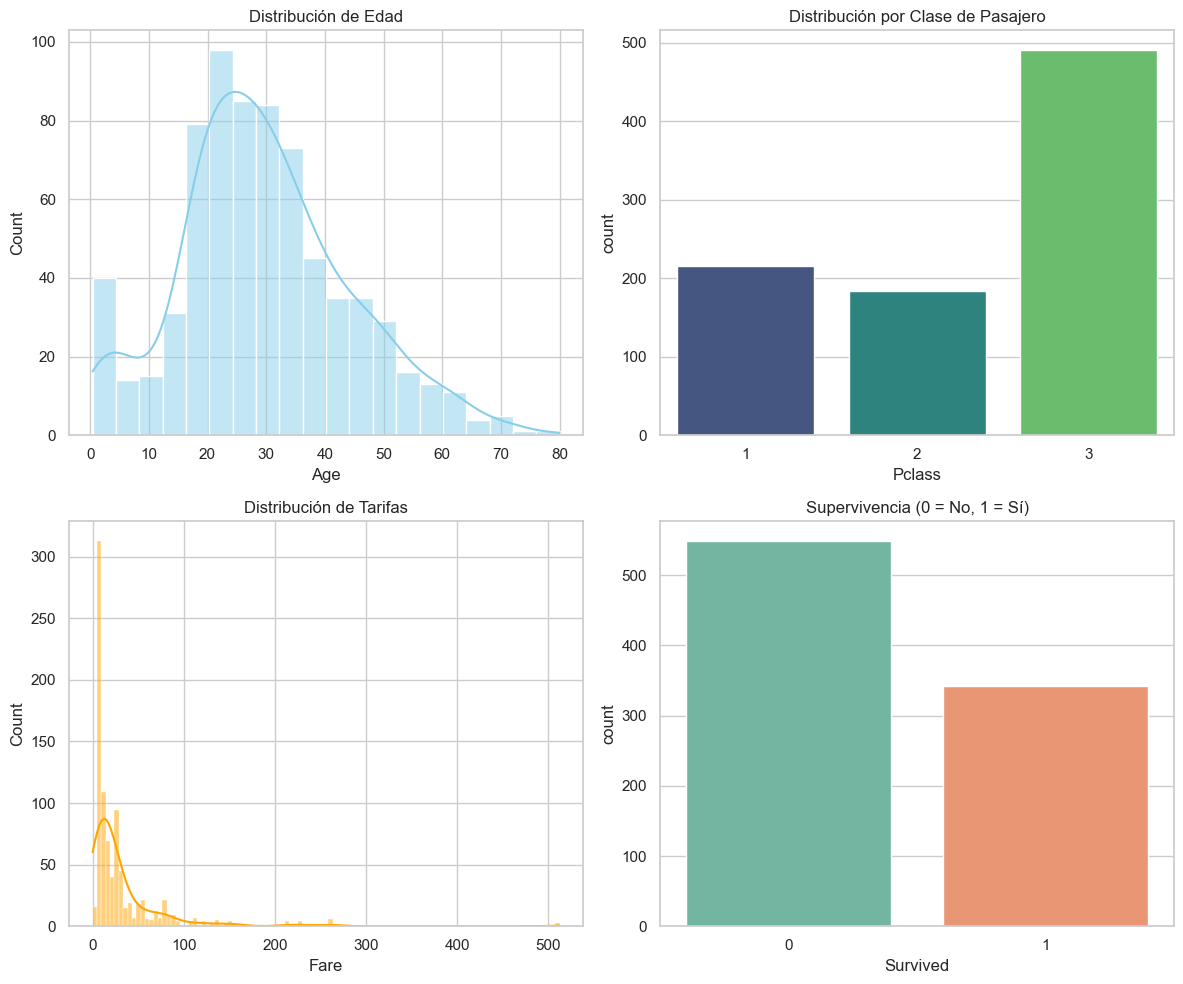

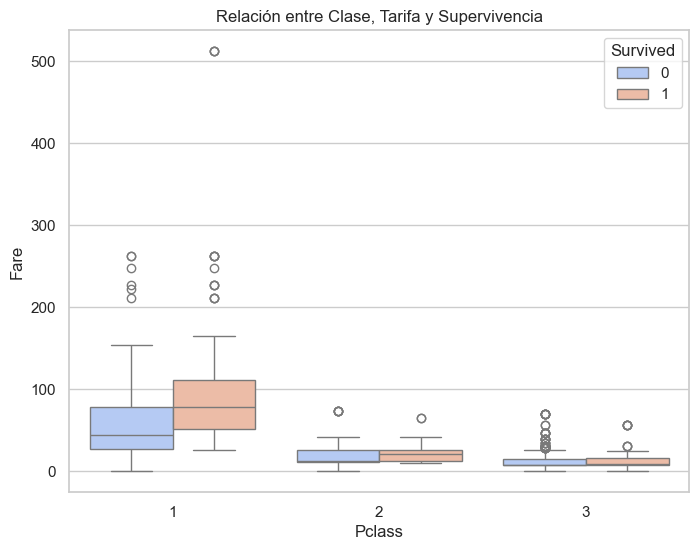

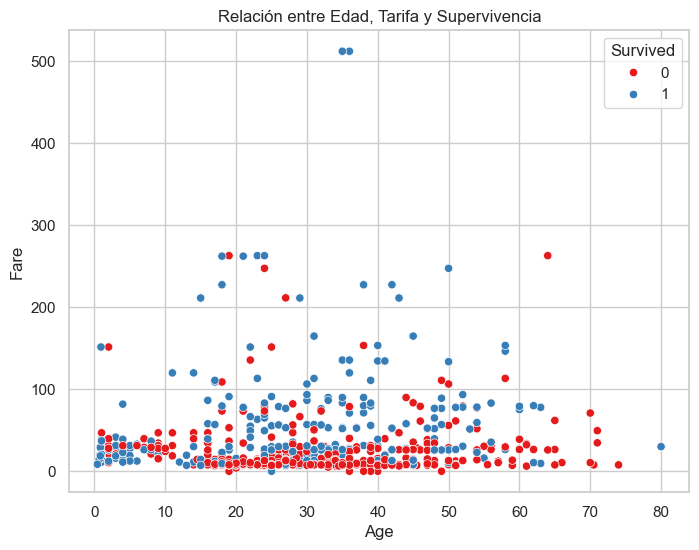

C:\Users\Leandro Esteban\AppData\Local\Temp\ipykernel_21156\3796680072.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)  # Rellenar valores faltantes en 'Age' con la mediana
C:\Users\Leandro Esteban\AppData\Local\Temp\ipykernel_21156\3796680072.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the int

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64
Características seleccionadas: Index(['Pclass', 'Parch', 'Fare', 'Sex_male', 'Embarked_S'], dtype='object')
Tamaño del conjunto de entrenamiento: (712, 5)
Tamaño del conjunto de prueba: (179, 5)
Matriz de confusión:
 [[88 17]
 [22 52]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Precisión: 0.7821229050279329


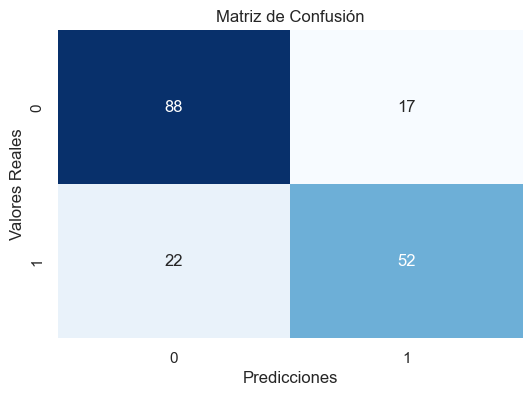

In [8]:
# Importar las bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo para gráficos
sns.set(style="whitegrid")

# Cargar el dataset

data = pd.read_csv("./Titanic-Dataset.csv")

# Mostrar una vista general de los datos
print(data.head())
print(data.info())
# Distribución de variables clave
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(data['Age'].dropna(), kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribución de Edad')

sns.countplot(x='Pclass', data=data, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Distribución por Clase de Pasajero')

sns.histplot(data['Fare'], kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Distribución de Tarifas')

sns.countplot(x='Survived', data=data, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Supervivencia (0 = No, 1 = Sí)')

plt.tight_layout()
plt.show()

# Análisis bivariado: relaciones entre variables
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=data, palette='coolwarm')
plt.title('Relación entre Clase, Tarifa y Supervivencia')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data, palette='Set1')
plt.title('Relación entre Edad, Tarifa y Supervivencia')
plt.show()
# Tratamiento de valores faltantes
data['Age'].fillna(data['Age'].median(), inplace=True)  # Rellenar valores faltantes en 'Age' con la mediana
data.drop(columns=['Cabin'], inplace=True)  # Eliminar columna 'Cabin'
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)  # Rellenar 'Embarked' con la moda

# Transformar variables categóricas a dummies
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Confirmar que no hay valores nulos
print(data.isnull().sum())
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

# Selección de características relevantes
X = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y = data['Survived']

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

print("Características seleccionadas:", selected_features)
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("Precisión:", accuracy_score(y_test, y_pred))
# Visualización de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

